In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
E_commerce_data = pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [3]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)":"C_service"}, axis = 1)

In [4]:
E_commerce_data

,Timestamp,Age,Gender,Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,C_service,Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [5]:
data = pd.DataFrame(columns=["Subscription_Status","Purchase_decision_rating","subscription"])

In [6]:
data['Subscription_Status']=E_commerce_data['Do you have any subscription on any E-Commerce site?']
data['Purchase_decision_rating']=E_commerce_data['On a scale of 0-5, how much does an overall product rating affect your purchase decision?']
data['subscription']=E_commerce_data['Gender']

In [7]:
data

,Subscription_Status,Purchase_decision_rating,subscription
0,Yes,4,Male
1,Yes,4,Male
2,Yes,4,Male
3,Yes,4,Male
4,No,4,Male
...,...,...,...
107,Yes,5,Male
108,No,1,Female
109,Yes,3,Female
110,No,3,Male


In [8]:
data1=data.groupby(['Subscription_Status','Purchase_decision_rating']).count()

In [9]:
data1

subscription
Subscription_Status Purchase_decision_rating              
No                  0                                    1
                    1                                    1
                    2                                    1
                    3                                   21
                    4                                   25
                    5                                   13
Yes                 2                                    1
                    3                                    8
                    4                                   31
                    5                                   10

In [10]:
data2 = pd.DataFrame(columns=["Subscription_Status","subscription"])
row_list = []
for i,j in data1.index:
    dict1 = {}
    dict1.update({'Subscription_Status': i, "Purchase_decision_rating":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1 

,Subscription_Status,Purchase_decision_rating
0,No,0
1,No,1
2,No,2
3,No,3
4,No,4
5,No,5
6,Yes,2
7,Yes,3
8,Yes,4
9,Yes,5


In [11]:
df1["total_subscription"] = list(data1.subscription)

In [12]:
df1

,Subscription_Status,Purchase_decision_rating,total_subscription
0,No,0,1
1,No,1,1
2,No,2,1
3,No,3,21
4,No,4,25
5,No,5,13
6,Yes,2,1
7,Yes,3,8
8,Yes,4,31
9,Yes,5,10


In [16]:
df1["Percentage_of_customer_Rating"] = df1.groupby("Subscription_Status").transform(lambda x: (x*100)/x.sum())

ValueError: Wrong number of items passed 2, placement implies 1

In [17]:
df1

,Subscription_Status,Purchase_decision_rating,total_subscription
0,No,0,1
1,No,1,1
2,No,2,1
3,No,3,21
4,No,4,25
5,No,5,13
6,Yes,2,1
7,Yes,3,8
8,Yes,4,31
9,Yes,5,10


ValueError: Could not interpret input 'Percentage_of_customer_Rating'

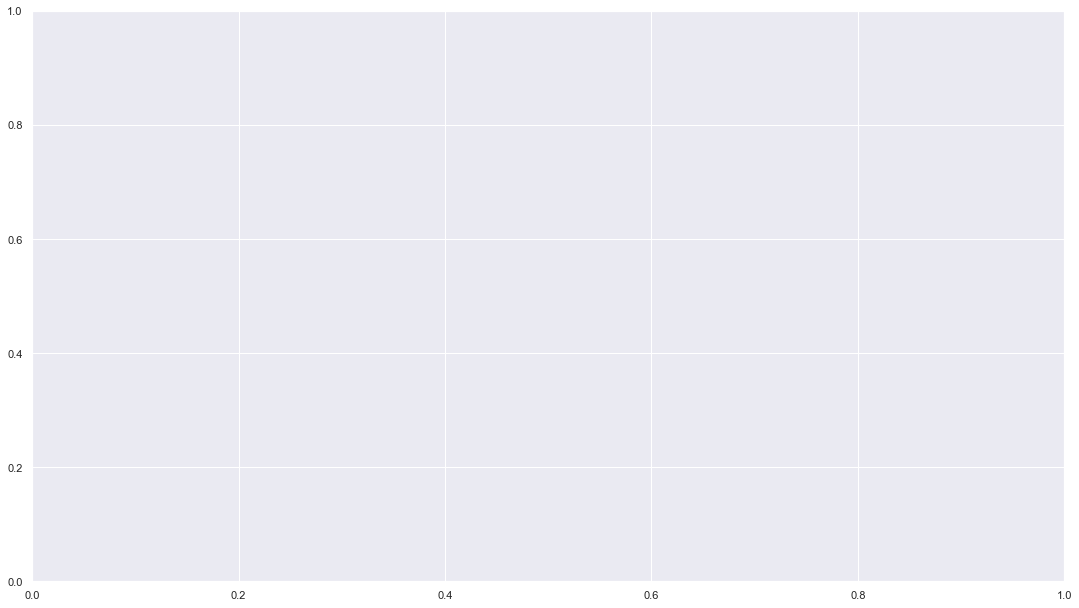

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
sns.barplot(x = 'Subscription_Status', y = 'Percentage_of_customer_Rating',
           data = df1,
           hue = 'Purchase_decision_rating')
fig.savefig('7.png',facecolor='lightgrey',transparent=True)